We look at the time evolution of $p(|s_i\rangle,|A_k\rangle)\forall k$ directly, which is the probability that schmidt i $|s_i\rangle$ be in the k's total energy eigenstate $|A_k\rangle$.

Being interested in how weight in the total energy eigenstates might not be shared evenly between the 2 Schmidt states, this serves the purpose of directly showing it, and helping us find useful tools to quantify it. 

In [1]:
import numpy as np
import qutip as qt
import math
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets

from q_solve import generate_result
from q_solve import generate_result_envi_superpo
from Schmidt_solve import compute_schmidt_states_new
from Schmidt_solve import compute_schmidt_full
from VN import plot_VN
from VN import compute_VN_time
from e_spectrum import plot_e_spectrum
from Neff import plot_Neff_schmidt_Neff_tot
from checkup import checkup
from make_gif import make_gif_distribs1s2_new

from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from PIL import Image
#from overlap import compute_schmidt_full


We define the necessary functions.

In [2]:



def update_plot(frames):
    # Clear previous plot
    plt.clf()
    frames = frames+1
    state = compute_schmidt_full(result,frames,1)
    state2 = compute_schmidt_full(result,frames,2)
    energy_coeff=[abs(np.vdot(state, eigenstate)) ** 2 for eigenstate in eigenstates_total]
    energy_coeff2=[abs(np.vdot(state2, eigenstate)) ** 2 for eigenstate in eigenstates_total]
    plt.plot(eigenenergies_total,energy_coeff);
    plt.plot(eigenenergies_total,energy_coeff2);
    plt.title(f"Plot of the probability that Schmidt1 and 2 are in the energy eigenstates for EI={EI} and w={w}")
    plt.xlabel("Eigenenergies of H_total")
    plt.ylabel("Probabilities")
    plt.legend(["Schmidt1","Schmidt2"])
    plt.ylim(0, 0.25)

def update_plot1(frames):
    # Clear previous plot
    plt.clf()
    frames = frames+1
    state = compute_schmidt_full(result,frames,1)
    energy_coeff=[abs(np.vdot(state, eigenstate)) ** 2 for eigenstate in eigenstates_total]
    plt.plot(eigenenergies_total,energy_coeff);
    plt.title(f"Plot of the probability that Schmidt1 be in energy eigenstates for EI={EI} and w={w}")
    plt.xlabel("Eigenenergies of H_total")
    plt.ylabel("Probabilities")
    plt.legend(["Schmidt1"])
    plt.ylim(0, 0.25)
    
def update_plot2(frames):
    # Clear previous plot
    frames = frames+1
    plt.clf()
    state2 = compute_schmidt_full(result,frames,2)
    energy_coeff2=[abs(np.vdot(state2, eigenstate)) ** 2 for eigenstate in eigenstates_total]
    plt.plot(eigenenergies_total,energy_coeff2);
    plt.title(f"Plot of the probability that Schmidt 2 be in an energy eigenstates for EI={EI} and w={w}")
    plt.xlabel("Eigenenergies of H_total")
    plt.ylabel("Probabilities")
    plt.legend(["Schmidt2"])
    plt.ylim(0, 0.25)

def make_gif_distribs1s2(EI,w):#H_total,result,EI

    # Create a figure
    fig = plt.figure(figsize=(10, 5))
    
    # Create the animation
    ani = FuncAnimation(fig, update_plot, frames=99, interval=100)

    # Save the animation as a GIF
    ani.save(f'Gifs/distrib_schmidt1_2_over_energy_spectrum_EI_{EI}_w_{w}.gif', writer='pillow')

def make_gif_distribs1(EI,w):
    # Create a figure
    fig = plt.figure(figsize=(10, 5))
    
    # Create the animation
    ani = FuncAnimation(fig, update_plot1, frames=99, interval=100)
    
    # Save the animation as a GIF
    ani.save(f'Gifs/Graphs/distrib_schmidt1_over_energy_spectrum_EI_{EI}_w_{w}.gif', writer='pillow')

def make_gif_distribs2(EI,w):
    # Create a figure
    fig = plt.figure(figsize=(10, 5))
    
    # Create the animation
    ani = FuncAnimation(fig, update_plot2, frames=99, interval=100)
    
    # Save the animation as a GIF
    ani.save(f'Gifs/Graphs/distrib_schmidt2_over_energy_spectrum_EI_{EI}_w_{w}.gif', writer='pillow')


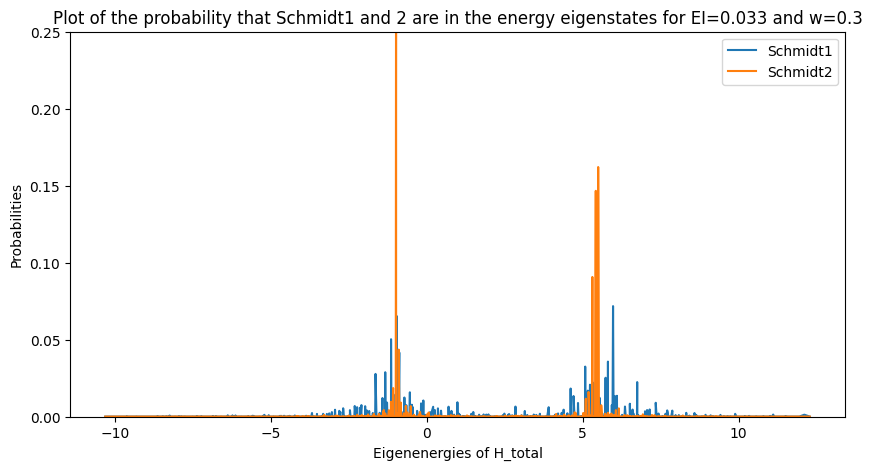

In [4]:
d1, d2 = 10, 200
E_spacing = 1.0
Int_strength = 0.033
EI=Int_strength
tmax= 10
ind_nb = 100
w=0.3
env = [75,150]
result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result_envi_superpo(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,0,env) 
eigenenergies_total, eigenstates_total = H_total.eigenstates()

make_gif_distribs1s2(EI,w)


In [5]:
#defining all quantities used in the simulation
d1, d2 = 10, 200
w = 0.1# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.03
# Define the time settings for the simulation
tmax= 10
ind_nb = 100

result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,0)
EI = Int_strength
eigenenergies_total, eigenstates_total = H_total.eigenstates() 

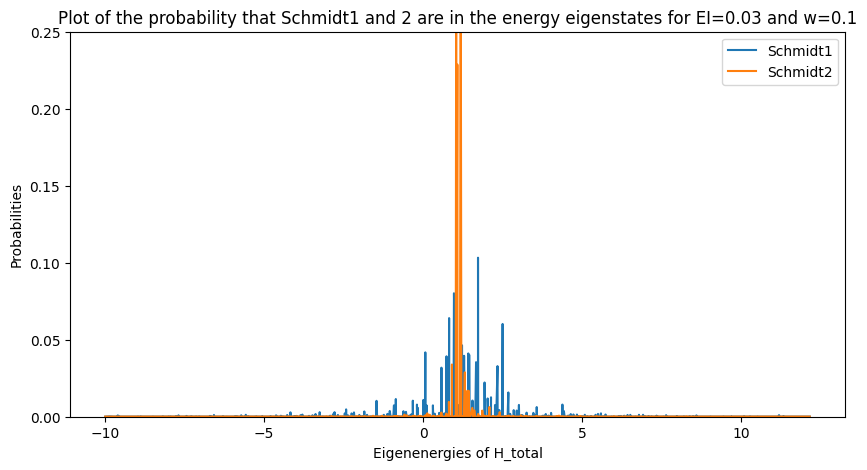

In [4]:

make_gif_distribs1s2(EI,w)

FileNotFoundError: [Errno 2] No such file or directory: 'Gifs/Graphs'

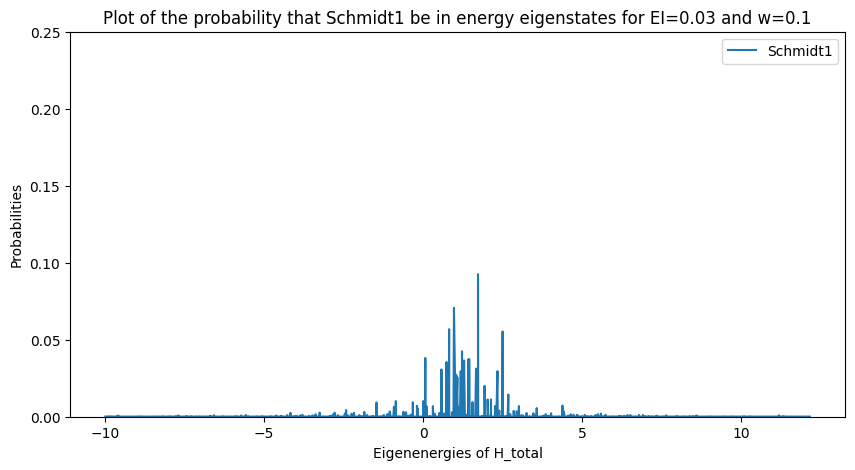

In [5]:
make_gif_distribs1(EI,w)

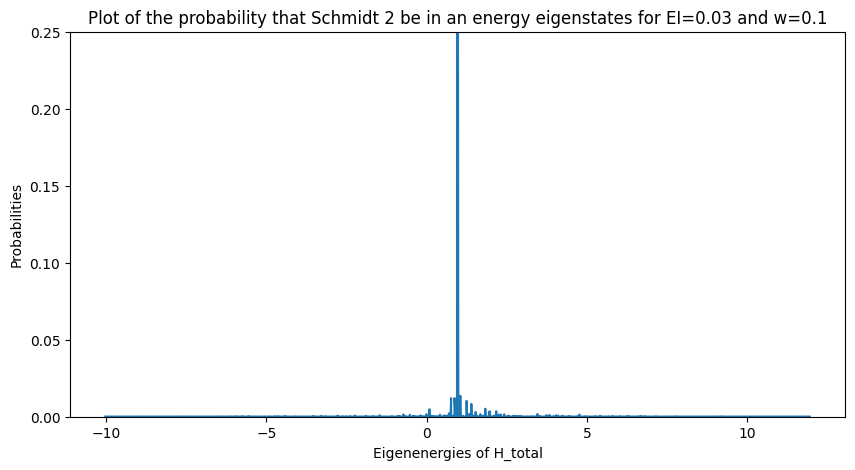

In [ ]:
make_gif_distribs2(EI,w)

In [ ]:
#defining all quantities used in the simulation
d1, d2 = 10, 200
w = 0.3# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.06
# Define the time settings for the simulation
tmax= 10
ind_nb = 100

result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,0)
EI = Int_strength
eigenenergies_total, eigenstates_total = H_total.eigenstates() 

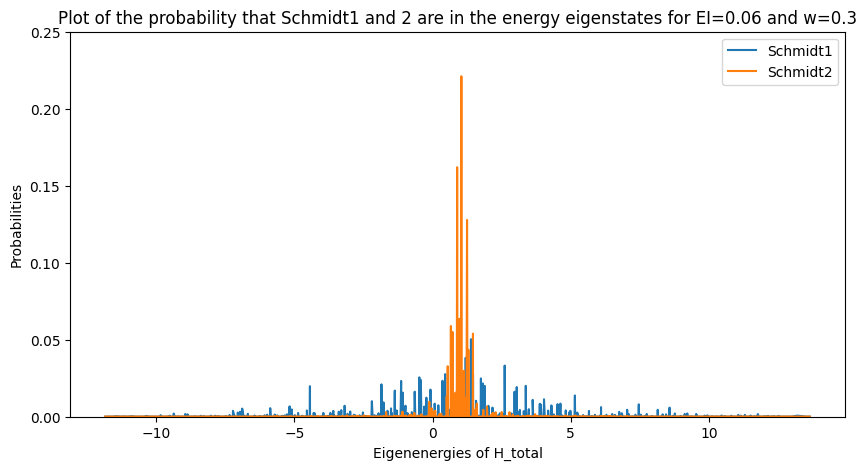

In [ ]:

make_gif_distribs1s2(EI,w)

In [ ]:
#make_gif_distribs1(EI,w)

In [ ]:
#make_gif_distribs2(EI,w)

In [ ]:
#defining all quantities used in the simulation
d1, d2 = 10, 200
w = 0.3# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.1
# Define the time settings for the simulation
tmax= 10
ind_nb = 100

result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,0)
EI = Int_strength
eigenenergies_total, eigenstates_total = H_total.eigenstates() 

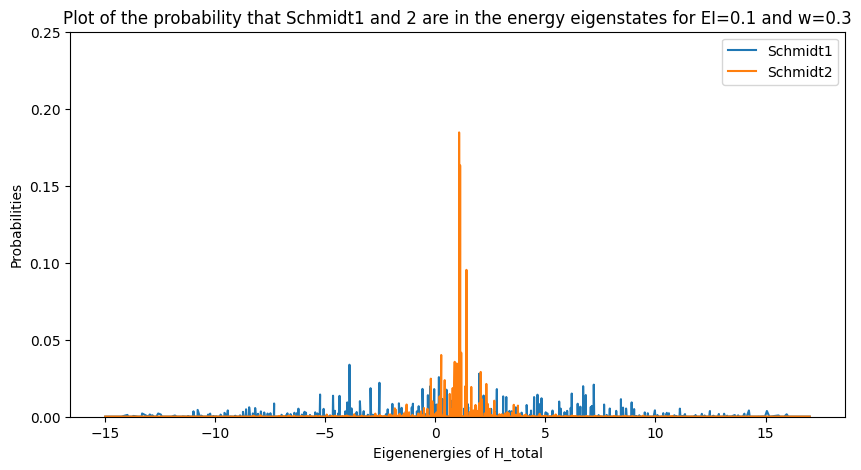

In [ ]:
make_gif_distribs1s2(EI,w)
#make_gif_distribs1(EI,w)
#make_gif_distribs2(EI,w)

In [ ]:
#defining all quantities used in the simulation
d1, d2 = 10, 200
w = 0.3# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.15
# Define the time settings for the simulation
tmax= 10
ind_nb = 100

result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,0)
EI = Int_strength
eigenenergies_total, eigenstates_total = H_total.eigenstates() 

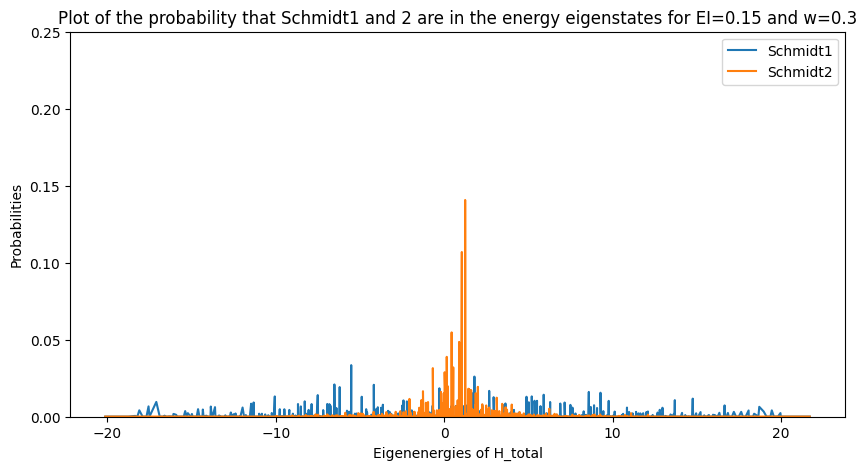

In [ ]:
make_gif_distribs1s2(EI,w)
#make_gif_distribs1(EI,w)
#make_gif_distribs2(EI,w)

In [ ]:
####Now we change w

In [ ]:
#defining all quantities used in the simulation
d1, d2 = 10, 200
w = 0.5# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.09
# Define the time settings for the simulation
tmax= 10
ind_nb = 100

result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,0)
EI = Int_strength
eigenenergies_total, eigenstates_total = H_total.eigenstates() 

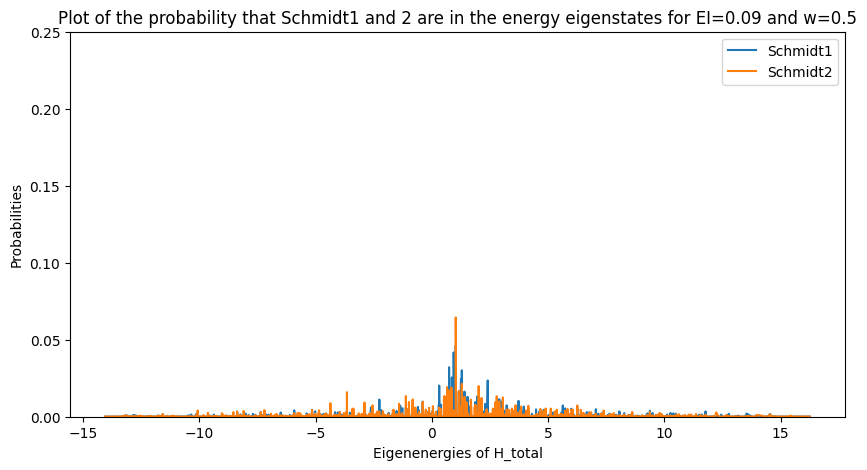

In [ ]:
make_gif_distribs1s2(EI,w)
#make_gif_distribs1(EI,w)
#make_gif_distribs2(EI,w)

In [ ]:
#defining all quantities used in the simulation
d1, d2 = 10, 200
w = 0.4# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.09
# Define the time settings for the simulation
tmax= 10
ind_nb = 100

result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,0)
EI = Int_strength
eigenenergies_total, eigenstates_total = H_total.eigenstates() 

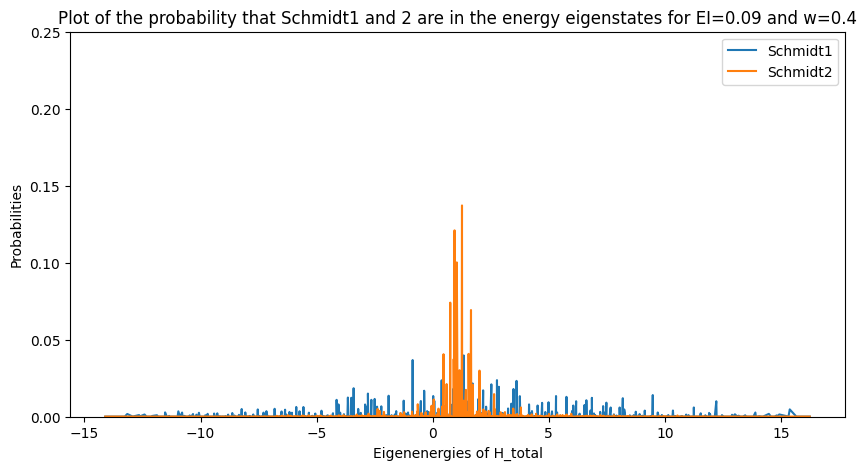

In [ ]:
make_gif_distribs1s2(EI,w)
#make_gif_distribs1(EI,w)
#make_gif_distribs2(EI,w)

In [ ]:
#defining all quantities used in the simulation
d1, d2 = 10, 200
w = 0.3# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.09
# Define the time settings for the simulation
tmax= 10
ind_nb = 100

result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,0)
EI = Int_strength
eigenenergies_total, eigenstates_total = H_total.eigenstates() 

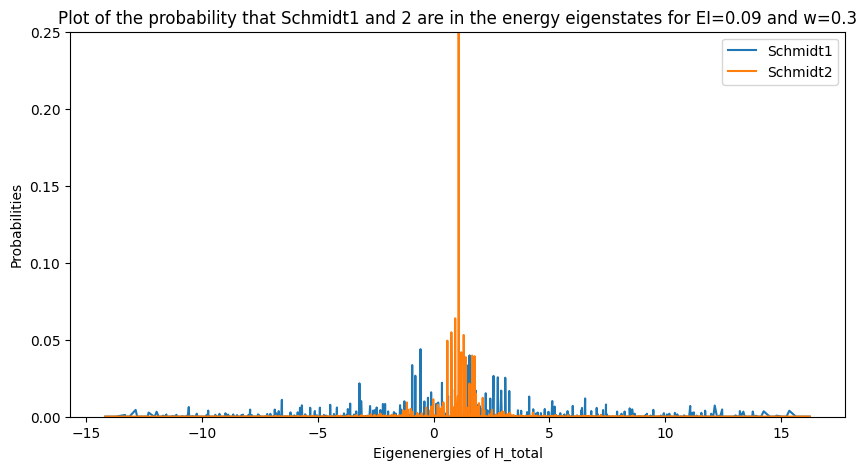

In [ ]:
make_gif_distribs1s2(EI,w)
#make_gif_distribs1(EI,w)
#make_gif_distribs2(EI,w)

In [ ]:
#defining all quantities used in the simulation
d1, d2 = 10, 200
w = 0.2# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.09
# Define the time settings for the simulation
tmax= 10
ind_nb = 100

result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,0)
EI = Int_strength
eigenenergies_total, eigenstates_total = H_total.eigenstates() 

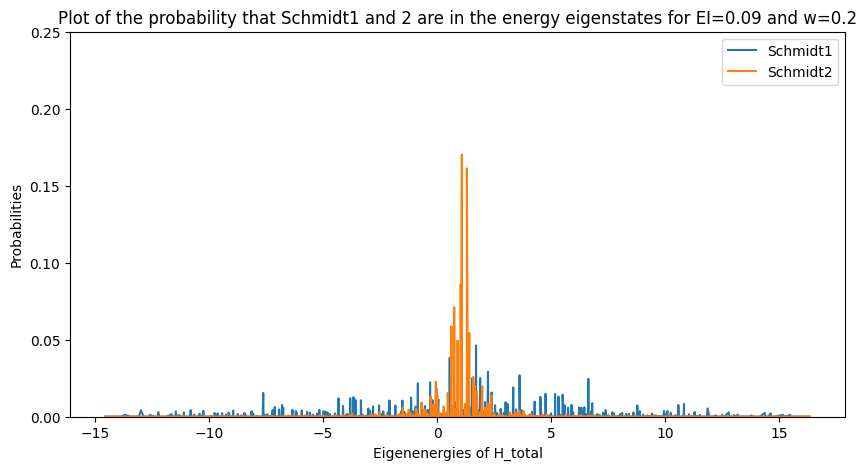

In [ ]:
make_gif_distribs1s2(EI,w)
#make_gif_distribs1(EI,w)
#make_gif_distribs2(EI,w)

To check that the spread is really due to w, we plot for w = 0.7

In [ ]:
#defining all quantities used in the simulation
d1, d2 = 10, 200
w = 0.7# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.09
# Define the time settings for the simulation
tmax= 10
ind_nb = 100

result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,0)
EI = Int_strength
eigenenergies_total, eigenstates_total = H_total.eigenstates() 

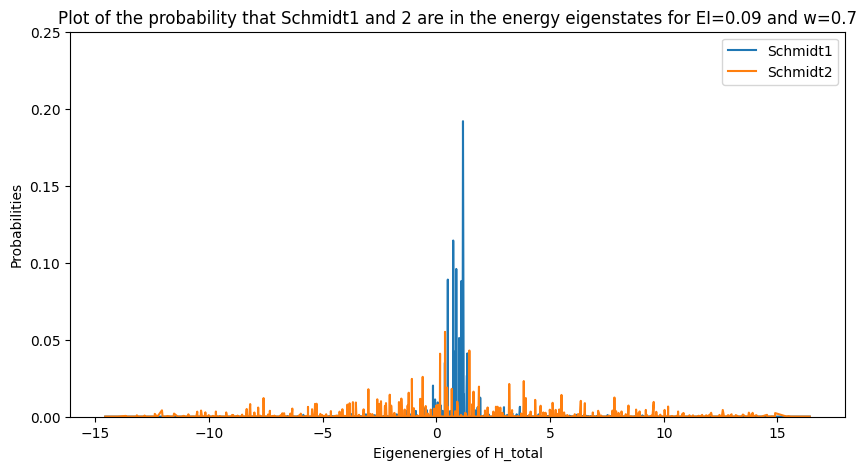

In [ ]:
make_gif_distribs1s2(EI,w)

In [ ]:
from IPython.display import HTML

# Replace 'path_to_your_gif.gif' with the path to your GIF file
gif_path = '/Users/maringirard/Dev/Quantum_Branching/distrib_schmidt1_2_over_energy_spectrum_EI_0.09_w_0.2.gif'

# Create HTML code to display the GIF
html_code = f'<img src="{gif_path}">'

# Display the GIF
display(HTML(html_code))
